# S H A R K - - A T T A C K S

In [175]:
import pandas as pd
import numpy as np
import matplotlib

In [176]:
# Importamos el dataset 
data = pd.read_csv('../../Downloads/global-shark-attacks/attacks.csv', encoding='latin-1')

In [177]:
data.shape

(25723, 24)

In [178]:
data.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


In [180]:
def missing_values(series):
    """ Calcular el número de Nan values por columna
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [181]:
# Como se puede observar, este dataset tiene en prácticamente todas sus columnas muchos valores null.
# Podríamos eliminar aquellas columnas que tienen más de un 0.9 de missing values
# ya que no nos aportan información.

In [200]:
missing_values(data)

Case Number               0.66
Date                      0.76
Year                      0.76
Type                      0.76
Country                   0.76
Area                      0.77
Location                  0.78
Activity                  0.78
Name                      0.76
Sex                       0.78
Age                       0.87
Injury                    0.76
Fatal (Y/N)               0.78
Time                      0.89
Species                   0.87
Investigator or Source    0.76
pdf                       0.76
href formula              0.76
href                      0.76
Case Number.1             0.76
Case Number.2             0.76
original order            0.75
Unnamed: 22               1.00
Unnamed: 23               1.00
Year_clean                0.80
dtype: float64

In [201]:
for name, values in data.iteritems():
    if missing_values(data[name]) > 0.9:
        data.drop(name, axis=1, inplace=True)

In [202]:
data.shape

(25723, 23)

In [185]:
# Vamos a ver el número de ataques de tiburón a partir de 1930

In [186]:
data['Year_clean']= data[data['Year'] >= 1930]['Year']

In [187]:
%matplotlib inline
year_values = data['Year_clean'].value_counts().sort_index()

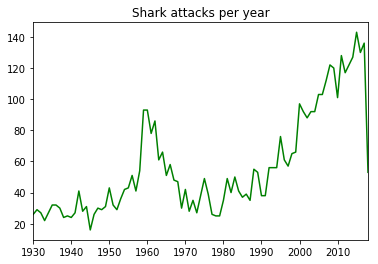

In [188]:
year_values.plot(title='Shark attacks per year', color='green')

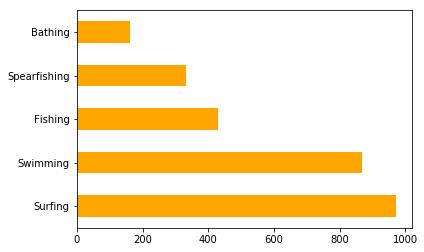

In [189]:
# Las 5 actividades más peligrosas:
# 1. Surfing
# 2. Swimming
# 3. Fishing
# 4. Spearfishing
# 5. Bathing


data.groupby("Activity").filter(lambda x: len(x) > 150).Activity.value_counts().plot.barh(color='orange')

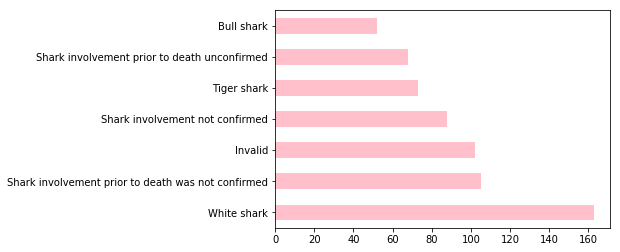

In [190]:
data.groupby("Species ").filter(lambda x: len(x) > 50)["Species "].value_counts().plot.barh(color='pink')

In [191]:
data['Sex '].value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: Sex , dtype: int64

In [193]:
data['Sex '].replace(to_replace=" ", value=r"", regex=True, inplace=True)

In [194]:
data['Sex '].unique()

array(['F', 'M', nan, 'lli', 'N', '.'], dtype=object)

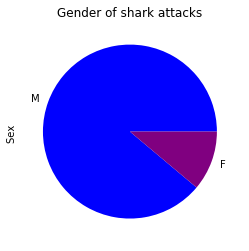

In [210]:
data[data['Sex '].isin(['M', 'F'])]['Sex '].value_counts().plot(kind='pie',title='Gender of shark attacks', colors=['blue','purple'])

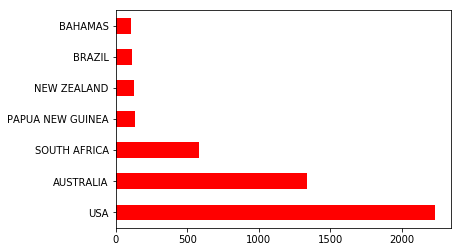

In [203]:
data.groupby("Country").filter(lambda x: len(x) > 100)["Country"].value_counts().plot.barh(color='red')

# Resumen...

B E - C A R E F U L !

- Si hacer surf...
- En una playa de EEUU...
- Si ves al gran blanco...
- Si eres hombre...
- Y tienes entre 20-30 años...